## 股價走勢圖畫起來

## 資料取自台灣經濟新報

In [1]:
#import packages
import numpy as np
import IPython as ip
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
ip.display.set_matplotlib_formats('svg')
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from matplotlib.finance import candlestick_ohlc

In [2]:
TSMC = pd.read_excel('TEJ_Excel練習_台積電.xlsx')

In [3]:
TSMC.describe()

,收盤價,開盤價,最高價,最低價,收盤價(元),成交量,投信買賣超(千股),自營買賣超(千股),外資買賣超(千股)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,87.188075,87.191425,87.903200,86.377125,73.281575,47830.980000,7.001500,87.248000,869.860000
std,30.672782,30.679021,30.881731,30.462342,31.777117,25436.501864,1606.569727,1404.926143,19076.002399
min,36.800000,36.400000,37.400000,36.400000,26.160000,4823.000000,-9685.000000,-8253.000000,-129233.000000
25%,61.800000,61.775000,62.100000,61.100000,46.190000,31188.000000,-488.250000,-551.250000,-8336.750000
50%,76.300000,76.300000,76.700000,75.400000,62.930000,42530.000000,0.000000,30.500000,842.000000
75%,109.500000,109.000000,110.000000,108.500000,95.432500,58470.750000,497.000000,699.000000,9735.250000
max,154.500000,154.000000,155.000000,152.500000,139.440000,423945.000000,13520.000000,9426.000000,103404.000000


In [4]:
TSMC.columns

Index(['證券代碼', '年月日', '收盤價', '開盤價', '最高價', '最低價', '收盤價(元)', '成交量', '投信買賣超(千股)',
       '自營買賣超(千股)', '外資買賣超(千股)'],
      dtype='object')

In [5]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY,date2num
from datetime import date

In [6]:
#蠟燭圖用時間
Timeline = pd.to_datetime(TSMC['年月日'], format='%Y/%m/%d', dayfirst= True, box= False)
Timeline1 = Timeline.dt.date
Date=date2num(Timeline1)

In [7]:
openingPrice, closingPrice, highestPrice, lowestPrice = TSMC['開盤價'], TSMC['收盤價'], TSMC['最高價'], TSMC['最低價']
Volume, IT, SO, FI = TSMC['成交量'], TSMC['投信買賣超(千股)'], TSMC['自營買賣超(千股)'], TSMC['外資買賣超(千股)']

In [8]:
T1 = TSMC['年月日']

In [9]:
#轉list
T2 = T1.tolist()

In [11]:
#一次看幾天
days = 100

In [12]:
stock= []
bar_Time ,bar_Volume, bar_IT, bar_SO, bar_FI = [], [], [], [], []
for i in range(days):
    a= [Date[i], openingPrice[i], highestPrice[i], lowestPrice[i], closingPrice[i]]
    b1, b2, b3, b4, b5= Timeline1[i], Volume[i], IT[i], SO[i], FI[i]
    stock.append(a)
    
    bar_Time.append(b1)
    bar_Volume.append(b2)
    bar_IT.append(b3)
    bar_SO.append(b4)
    bar_FI.append(b5)

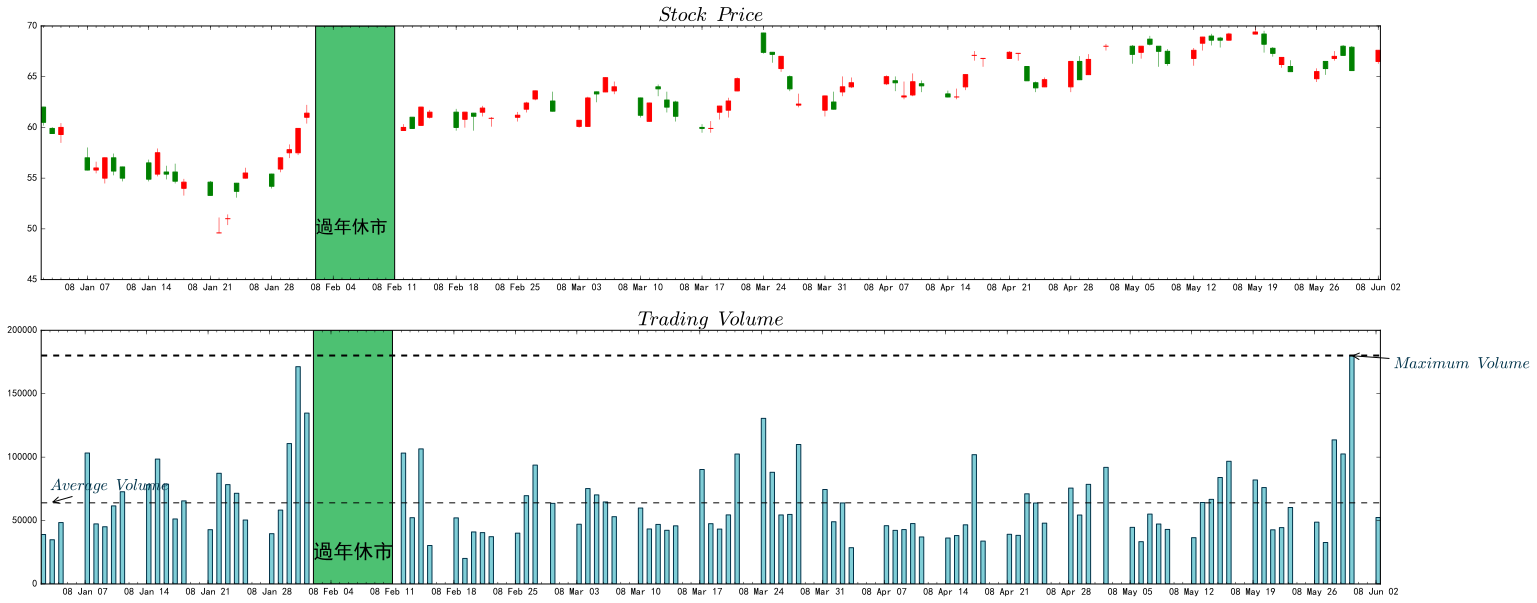

In [23]:
plt.figure(figsize=(24,10),dpi=100)
p1 = plt.subplot(211)
mondays = WeekdayLocator(MONDAY)
#日期格式為‘15-Mar-09’形式
weekFormatter = DateFormatter('%y %b %d')
p1.xaxis.set_major_locator(mondays)
p1.xaxis.set_minor_locator(DayLocator())
p1.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(p1, stock, width = 0.5, colorup='r',colordown='g')
p1.set_title('$Stock$ $Price$', fontsize= 20)

p2 = plt.subplot(212)
p2.xaxis.set_major_locator(mondays)
p2.xaxis.set_minor_locator(DayLocator())
p2.xaxis.set_major_formatter(weekFormatter)
p2.set_title('$Trading$ $Volume$', fontsize= 20)
p2.bar(bar_Time, bar_Volume, width=0.5, color='#80CED7', edgecolor= '#003249', linewidth= 1)
#最大值
p2.axhline(Volume[:days].max(), color='k', linestyle='dashed', linewidth=2)
#最大值標號、箭頭
p2.annotate('$Maximum$ $Volume$',xy=(stock[Volume[:days].argmax()][0], Volume[:days].max()),xytext=(stock[Volume[:days].argmax()][0]+5, Volume[:days].max() -10000),
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"), color= '#003249', fontsize=16)
#平均線
p2.axhline(Volume[:days].mean(), color='k', linestyle='dashed', linewidth=1)
#平均線標號、箭頭
p2.annotate('$Average$ $Volume$',xy=(stock[1][0], Volume[:days].mean()),xytext=(stock[1][0], Volume[:days].mean() +10000),
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3"), color= '#003249', fontsize=16)

p1.axvspan(stock[22][0]+1, stock[23][0]-1, fc='#4DC172')
p1.text(stock[22][0]+1, openingPrice[:days].min(), '過年休市', fontsize= 18, color= 'k')

p2.axvspan(stock[22][0]+1, stock[23][0]-1, fc='#4DC172')
p2.text(stock[22][0]+1, Volume[:days].min(), '過年休市', fontsize= 20, color= 'k')
#p1.grid(True, color='k', lw=1)
plt.savefig('Stock_price_tendency.png')
plt.savefig('Stock_price_tendency.svg')
plt.show()